In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = "PzeR_WPU8gf7XqxYDstM"
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Precio del dolar mensual (en pesos mexicanos)

              Value
Date               
1993-11-30   3.1498
1993-12-31   3.1083
1994-01-31   3.1078
1994-02-28   3.1218
1994-03-31   3.3026
1994-04-30   3.3495
1994-05-31   3.3167
1994-06-30   3.3671
1994-07-31   3.4031
1994-08-31   3.3814
1994-09-30   3.4022
1994-10-31   3.4212
1994-11-30   3.4425
1994-12-31   3.9748
1995-01-31   5.6405
1995-02-28   5.6779
1995-03-31   6.7770
1995-04-30   6.2285
1995-05-31   5.9741
1995-06-30   6.2330
1995-07-31   6.1220
1995-08-31   6.2047
1995-09-30   6.3167
1995-10-31   6.7452
1995-11-30   7.6936
1995-12-31   7.6870
1996-01-31   7.4806
1996-02-29   7.5183
1996-03-31   7.5682
1996-04-30   7.4694
...             ...
2015-06-30  15.4792
2015-07-31  15.9515
2015-08-31  16.5340
2015-09-30  16.8387
2015-10-31  16.5697
2015-11-30  16.6306
2015-12-31  17.0696
2016-01-31  18.0648
2016-02-29  18.4332
2016-03-31  17.6303
2016-04-30  17.4795
2016-05-31  18.1360
2016-06-30  18.6538
2016-07-31  18.6155
2016-08-31  18.4742
2016-09-30  19.2436
2016-10-31  18.8912


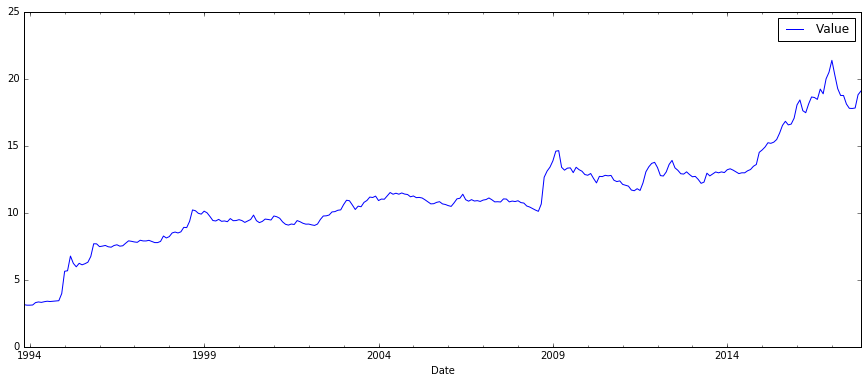

In [151]:
#dolar = quandl.get("FED/RXI_N_M_MX")
dolar = pd.read_csv("dolar_m", index_col=0, parse_dates=True) # interpreta 1a col. como fechas, no como cadenas
print(dolar)
dolar.plot()

In [152]:
#dolar.to_csv("dolar_m")

              Value
Date               
2011-01-31  12.1280
2011-02-28  12.0649
2011-03-31  11.9963
2011-04-30  11.7059
2011-05-31  11.6542
2011-06-30  11.8055
2011-07-31  11.6741


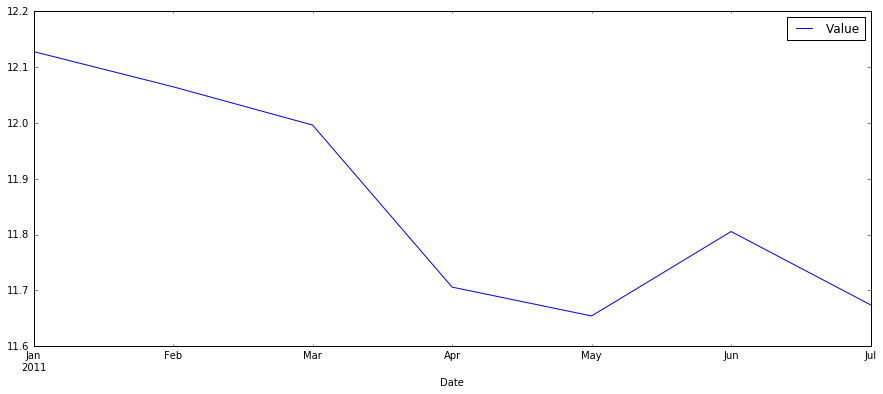

In [153]:
print(dolar["2011-1":"2011-7"])  # si fueran cadenas sería "2011-01":"2011-07"
dolar["2011-1":"2011-7"].plot()

interpolando precio del dolar en febrero de 2011...

In [154]:
enero = dolar["2011-1":"2011-1"].values[0]
marzo = dolar.loc["2011-3"].values[0]
interp = (enero+marzo)/2
print("interpolado:", interp, "real:", dolar.loc["2011-2"].values[0])

interpolado: [ 12.06215] real: [ 12.0649]


# Nivel del mar promedio (hemisferio norte)

In [155]:
#heminorte = pd.read_table("http://sealevel.colorado.edu/files/current/sl_nh.txt", 
#                          sep="\s+", index_col=0, header=0, usecols=[0,1])["msl_ib(mm)"]
heminorte = pd.read_csv("heminorte", index_col=0, header=None, names=["year", "msl_ib(mm)"])["msl_ib(mm)"]
#heminorte.to_csv("heminorte")
#heminorte.plot()
heminorte


year
1992.9323    13.717
1992.9595     1.328
1992.9866   -13.375
1993.0138   -24.723
1993.0409   -29.231
1993.0681   -32.538
1993.0952   -35.588
1993.1223   -26.579
1993.1495   -29.622
1993.1766   -34.527
1993.2038   -34.250
1993.2309   -28.518
1993.2581   -30.437
1993.2852   -21.371
1993.3124   -19.196
1993.3395   -23.758
1993.3667   -23.628
1993.3938   -17.808
1993.4210   -10.085
1993.4481    -2.120
1993.4753    -1.728
1993.5024    -4.942
1993.5296     5.074
1993.5567     0.386
1993.5839    22.555
1993.6110    22.201
1993.6382    29.060
1993.6653    23.325
1993.6925    16.635
1993.7196    21.488
              ...  
2015.7639    99.108
2015.7910    96.789
2015.8182    92.405
2015.8453    81.278
2015.8725    79.341
2015.8996    78.108
2015.9268    76.599
2015.9539    69.691
2015.9811    59.957
2016.0082    46.712
2016.0354    42.882
2016.0625    45.051
2016.0897    43.793
2016.1168    46.603
2016.1440    49.218
2016.1711    44.274
2016.1983    33.961
2016.2254    42.199
2016.2526    45

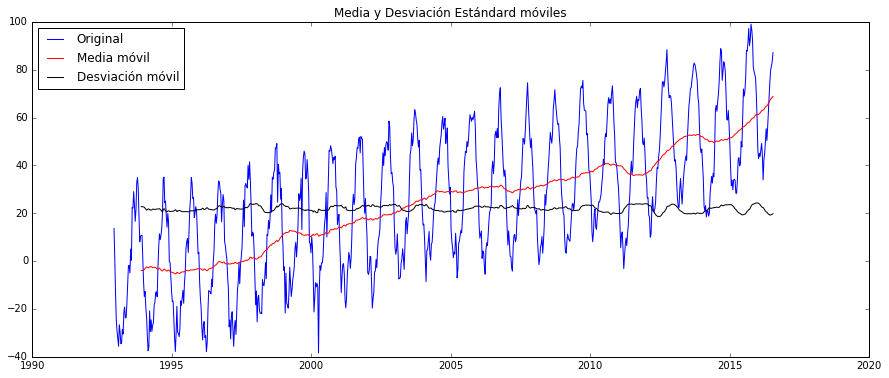

Resultados de la prueba de Dickey-Fuller:
Estadística de la prueba     -1.474823
valor-p                       0.545927
#retrasos usados             21.000000
Número de observaciones     847.000000
Valor crítico (1%)           -3.438094
Valor crítico (5%)           -2.864958
Valor crítico (10%)          -2.568590
dtype: float64


In [156]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, win=37):
    
    # mMedidas móviles
    rol = timeseries.rolling(window=win, center=False)
    rolmean = rol.mean()
    rolstd = rol.std()

    #graficar medidas móviles:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Media móvil')
    std = plt.plot(rolstd, color='black', label = 'Desviación móvil')
    plt.legend(loc='best')
    plt.title('Media y Desviación Estándard móviles')
    plt.show(block=False)
    
    #Realiza prueba de Dickey-Fuller:
    print ('Resultados de la prueba de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estadística de la prueba','valor-p','#retrasos usados','Número de observaciones'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print (dfoutput)

test_stationarity(heminorte)

# Caminante aleatorio

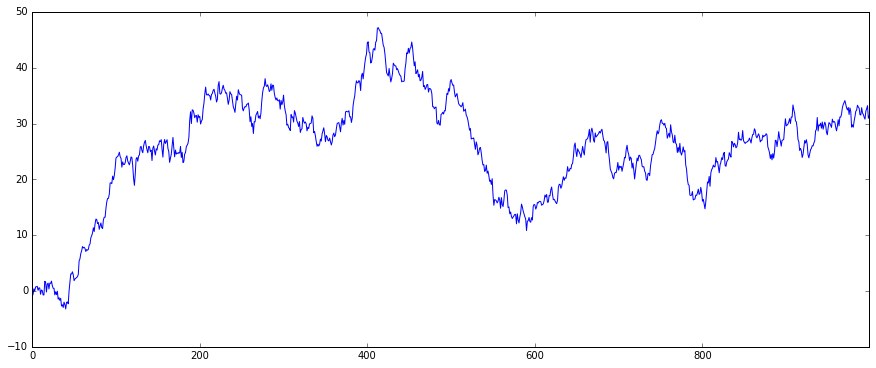

In [157]:
caminante = pd.Series(np.random.randn(1000).cumsum())
caminante.plot()

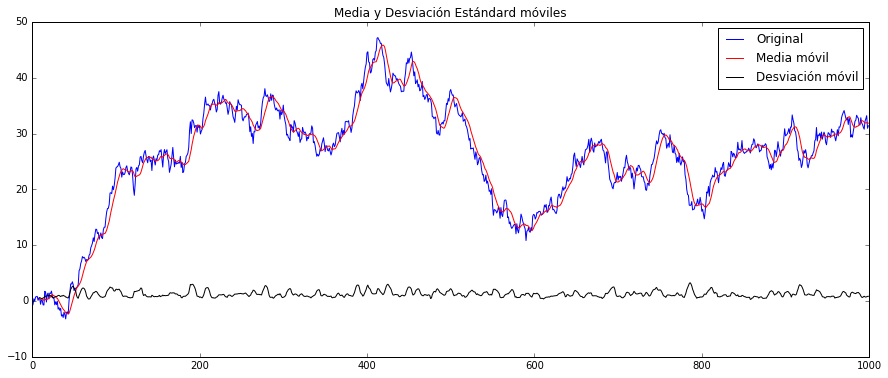

Resultados de la prueba de Dickey-Fuller:
Estadística de la prueba     -2.736631
valor-p                       0.067911
#retrasos usados              0.000000
Número de observaciones     999.000000
Valor crítico (1%)           -3.436913
Valor crítico (5%)           -2.864437
Valor crítico (10%)          -2.568313
dtype: float64


In [158]:
test_stationarity(caminante, 10)

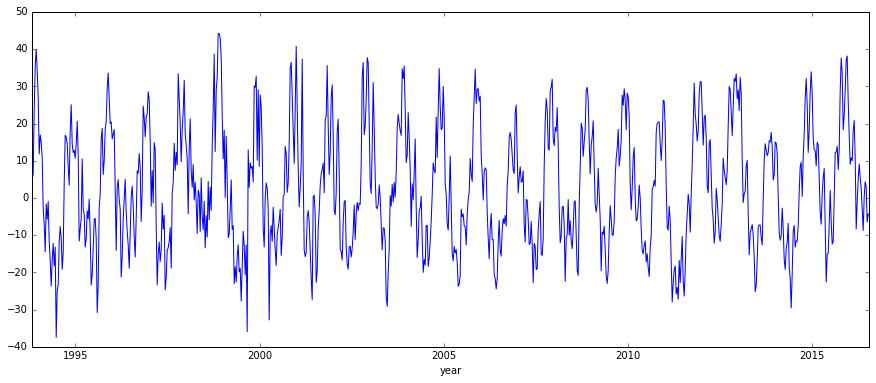

In [159]:
hn = heminorte-heminorte.shift(33)
hn.dropna(inplace=True)
hn.plot()

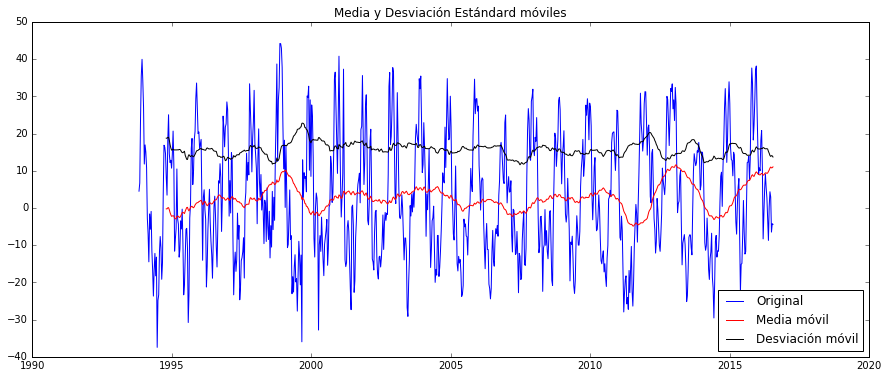

Resultados de la prueba de Dickey-Fuller:
Estadística de la prueba   -9.088360e+00
valor-p                     3.884515e-15
#retrasos usados            2.100000e+01
Número de observaciones     8.140000e+02
Valor crítico (1%)         -3.438409e+00
Valor crítico (5%)         -2.865097e+00
Valor crítico (10%)        -2.568664e+00
dtype: float64


In [160]:
test_stationarity(hn)

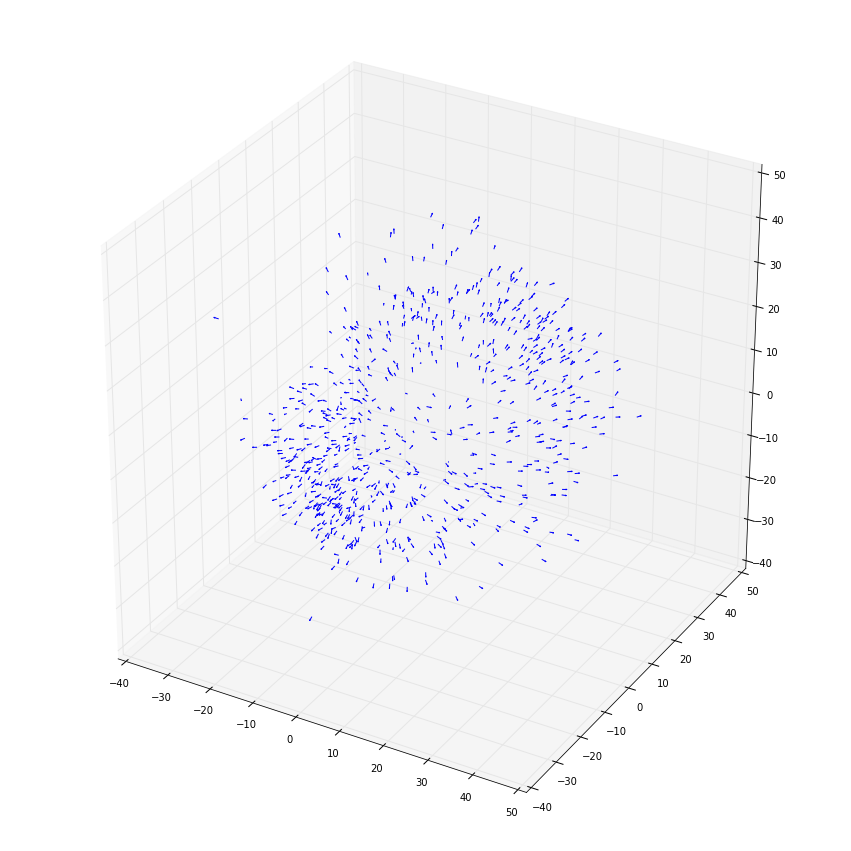

In [161]:
%matplotlib inline
k=33
s=1
#plt.plot(hn.values[:-k:s],hn.values[k::s])
rcParams['figure.figsize'] = 15, 15

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=hn.values[:-2*k:s]
b=hn.values[k:-k:s]
c=hn.values[2*k::s]
ax.quiver(a[:-1],b[:-1],c[:-1], a[1:],b[1:],c[1:])